In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Load your regression dataset
dataset_path = '/content/housing_price_dataset.csv'
df = pd.read_csv(dataset_path)

In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
df = df.drop('Neighborhood', axis=1)

In [ ]:
df

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
0,2126,4,1,1969,215355.283618
1,2459,3,2,1980,195014.221626
2,1860,2,1,1970,306891.012076
3,2294,2,1,1996,206786.787153
4,2130,5,2,2001,272436.239065
...,...,...,...,...,...
49995,1282,5,3,1975,100080.865895
49996,2854,2,2,1988,374507.656727
49997,2979,5,3,1962,384110.555590
49998,2596,5,2,1984,380512.685957


In [ ]:
# Extract features and target variable
X = df.drop('SquareFeet', axis=1)  # Features
y = df['Price']  # Target variable

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Define the neural network model for regression
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)  # Output layer for regression (1 neuron)
])

In [ ]:
# Compile the model for regression
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model for regression
history_reg = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1000/1000 [==============================] - 4s 3ms/step - loss: 51566768128.0000 - val_loss: 39304974336.0000
Epoch 2/10
1000/1000 [==============================] - 6s 6ms/step - loss: 19013537792.0000 - val_loss: 4413743616.0000
Epoch 3/10
1000/1000 [==============================] - 6s 6ms/step - loss: 2369504256.0000 - val_loss: 467062304.0000
Epoch 4/10
1000/1000 [==============================] - 4s 4ms/step - loss: 1228232704.0000 - val_loss: 229452304.0000
Epoch 5/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1138322560.0000 - val_loss: 188027440.0000
Epoch 6/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1081519488.0000 - val_loss: 148967040.0000
Epoch 7/10
1000/1000 [==============================] - 3s 3ms/step - loss: 1045919744.0000 - val_loss: 115932512.0000
Epoch 8/10
1000/1000 [==============================] - 2s 2ms/step - loss: 1001590144.0000 - val_loss: 91855032.0000
Epoch 9/10
1000/1000 [======================

In [ ]:
# Evaluate the model on the test set
test_loss_reg = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (MSE) for Regression: {test_loss_reg:.4f}')

Test Loss (MSE) for Regression: 66144376.0000


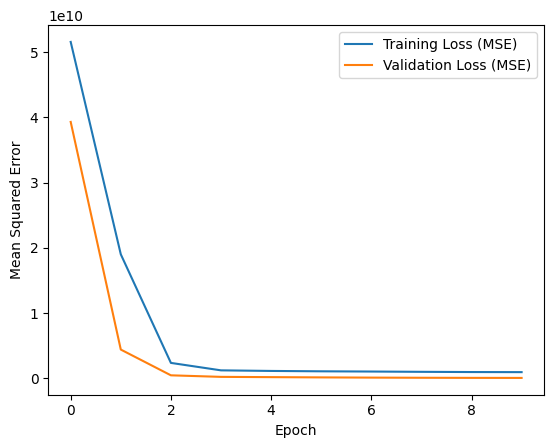

In [ ]:
# Plot training history for regression
plt.plot(history_reg.history['loss'], label='Training Loss (MSE)')
plt.plot(history_reg.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()